**მონაცემთა ანალიზი პითონის გამოყენებით**
<br>
Date: **2020 წლის 27 ივნისი**
<br>

სათაური: **ლექცია №5: მანქანის ფასების პროგნოზი**
<br>
მომხსენებელი: **შოთა ცისკარიძე**

<h1 align="center">მანქანის ფასების პროგნოზი</h1>


- ეს ამოცანა აღებულია Kaggle-ის ამოცანებიდან


- Kaggle არის მონაცემთა მეცნიერების უდიდესი მსოფლიო საზოგადოება, რომელსაც აქვს ძლიერი ხელსაწყოები და რესურსები, და რომელიც ხელს უწყობს ათასობით მომხმარებელს მონაცემთა მეცნიერების მიზნების მისაღწევად



- **ამოცანის პირობია**:
  
  ჩინურ საავტომობილო კომპანიას Geely Auto სურს აშშ-ის ბაზარზე შესვლა, იქ თავისი წარმოების განყოფილება შექმნა და ადგილობრივად მანქანების წარმოება, რათა კონკურენცია გაუწიოს ამერიკელ და ევროპულ კოლეგებს.

  მათ გააფორმეს კონტრაქტი საავტომობილო საკონსულტაციო კომპანიასთან იმის გასაგებად, თუ რა პარამეტრებზეა დამოკიდებული მანქანების ფასები. კერძოდ, მათ სურთ გაიგონ პარამეტრები, რომლებიც გავლენას ახდენს მანქანების ფასებზე ამერიკულ ბაზარზე, რადგან ეს შეიძლება ძალიან განსხვავდებოდეს ჩინეთის ბაზრისგან. 
  
  კომპანიას სურს იცოდეს: 
  - რომელი პარამეტრებია მნიშვნელოვანია მანქანის ფასის პროგნოზირებაშირამდენად
  - რამდენად შეესაბამება ეს ცვლადი აღწერს მანქანის ფასს ბაზრის სხვადასხვა გამოკითხვებზე დაყრდნობით
  
  საკონსულტაციო ფირმამ შეაგროვა სხვადასხვა ტიპის მანქანების დიდი მონაცემთა ნაკრები ამერიკის ბაზარზე.


- ბიზნესის მიზანი:

  ჩვენ მიზანია ავტომობილების ფასის მოდელირება, ხელმისაწვდომი დამოუკიდებელი ცვლადების გამოყენებით. ეს ინფორმაცია გამოიყენებულ იქნება მენეჯმენტის მიერ იმის გასაგებად, თუ რამდენად იცვლება ფასები დამოუკიდებელი პარამეტრების ცვლილებით. შესაბამისად, მათ შეეძლებათ მოახდინონ მანიპულირება მანქანების დიზაინზე, ბიზნეს სტრატეგიაზე და ა.შ., გარკვეული ფასების დონის დასაკმაყოფილებლად. გარდა ამისა, ეს მოდელი კარგი საშუალება იქნება ახალი ბაზრის ფასების დინამიკის გასაგებად.

<h3 align="center">1. ბიბლიოთეკების იმპორტირება</h3>

In [1]:
# to remove some user warnings from pandas and numpy
import warnings
warnings.filterwarnings('ignore')

# for numerical computations
import numpy as np
import pandas as pd

# for plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for training models, evaluations and feature processing
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate

<h3 align="center">2. შემოვიტანოთ დამხმარე მეთოდები</h3>

In [2]:
def hist_plot(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='DarkRed')

    fig.tight_layout()
    plt.show()

In [3]:
def pie_plot(series, figsize=(7, 7)):
    ax_ = plt.figure(figsize=figsize).add_subplot()
    ax_.pie(series.value_counts(), labels=series.value_counts().index)

In [4]:
def corr_plot(dataframe, figsize=(10, 10)):
    axes_ = plt.figure(figsize=figsize).add_subplot()
    corr = dataframe.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

In [5]:
def barh_plot(series, figsize=(10, 10)):
    ax_ = plt.figure(figsize=figsize).add_subplot()
    ax_.barh(series.index, series.values)

In [6]:
def show_top_unique_values(dataframe, features=None, top_n=10):
    if not features:
        features = dataframe.columns
    
    data = {}
    for feature in features:
        if feature in dataframe.columns:
            data[feature] = dataframe[feature].value_counts().index.values[:top_n]
    
    return data

<h3 align="center">3. მონაცემების წაკითა</h3>


- მონაცემებზე წვდომა შესაძლებელია შემდეგ ბმუკზე:
  
  https://www.kaggle.com/hellbuoy/car-price-prediction/download

In [9]:
cars = pd.read_csv('./Data/CarPrice_Assignment.csv')

In [10]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<h3 align="center">4. ექსპლოატორული მონაცემების ანალიზი (EDA)</h3>

- **მონაცემების რაოდენობის შემოწმება**: ვინაიდან მონაცემების რაოდენობა ძალიან დაბალია, ჩვენი მოდელი არ იქნება ისეთი კარგი, როგორც ეს ზოგადად უნდა იყოს

In [12]:
cars.shape

(205, 26)

- **მონაცემთა მახასიათებლების სახელები დადგენა**. მახასიათებლების შინაარსი ადვილად გასაგებია მონაცემთა სტრუქტურიდან გამომდინარე:

In [27]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- **თითოეული მახასიათებლის მნიშვნელობებზე სწრაფი მიმოხილვის**. ჩვენ შეგვიძლია ჩამოვთვალოთ თითოეული მახასიათებლის ყველაზე ხშირი მნიშვნელობები:

In [19]:
show_top_unique_values(cars, top_n=5)

{'car_ID': array([205,  64,  74,  73,  72], dtype=int64),
 'symboling': array([ 0,  1,  2,  3, -1], dtype=int64),
 'CarName': array(['toyota corolla', 'peugeot 504', 'toyota corona', 'subaru dl',
        'honda civic'], dtype=object),
 'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['four', 'two'], dtype=object),
 'carbody': array(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'],
       dtype=object),
 'drivewheel': array(['fwd', 'rwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'wheelbase': array([94.5, 93.7, 95.7, 96.5, 98.4]),
 'carlength': array([157.3, 188.8, 166.3, 171.7, 186.7]),
 'carwidth': array([63.8, 66.5, 65.4, 63.6, 64.4]),
 'carheight': array([50.8, 52. , 55.7, 54.5, 54.1]),
 'curbweight': array([2385, 1989, 1918, 2275, 3230], dtype=int64),
 'enginetype': array(['ohc', 'ohcf', 'ohcv', 'l', 'dohc'], dtype=object),
 'cylindernumber': array(['four

In [24]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- **მონაცემების ფორმატის შემოწმება**. ხშირად შეიძლება მოხდეს, რომ მახასიათებლების რიცხვითი მნიშნველობები წარმოდგენილი იყოს სტრიქონის ფორმატში. ამიტონ, მაინც გადავამოწმოთ რომ მონაცემები სწორედ არის გამოძახებული:

In [26]:
numerical_features = cars.T[cars.dtypes != 'object'].T.columns.tolist()
numerical_features

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

- **შევამოწმოთ ცარიელ (NaN) მონაცემებზე**:

In [29]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- სიმარტივისთვის, ჩვენ მხოლოდ რიცხობრივ მახასიათებლებს განვიხილავთ. ჩვეულებრივ, ყველა მახასიათებელი გამოიყენება მათი მნიშვნელობისა და სამიზნესთან კორელაციის გათვალისწინებით.

In [31]:
cars = cars[numerical_features]

<h3 align="center">მონაცემთა ვიზუალიზაცია</h3>

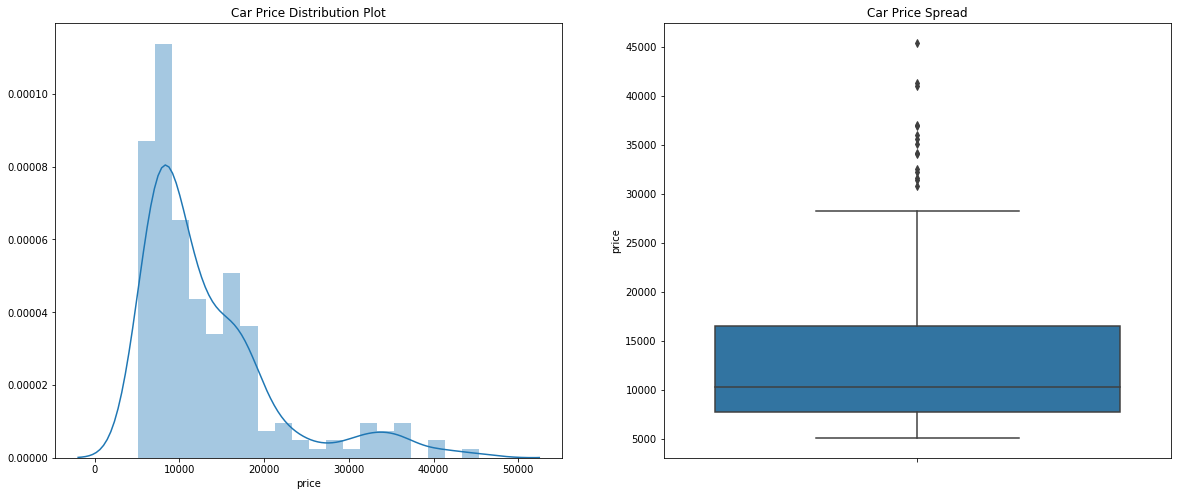

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price, bins=20)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

- **შემაჯამებელი სტატისტიკის ნახვა**:

In [37]:
cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

- **დასკვნა**: 
  - მონაცემები არის მარჯვნივ-შეკრებილი, რაც იმას ნიშნავს, რომ მონაცემებში ყველაზე ხშირად დაბალი ფასები გვხვდება(15,000 ქვემოთ);
  - ფასების განაწილების საშუალო და მედიანა მნიშვნელოვანი განსხვავდება ერთმანეთისგან
  - მონაცემთა წერტილები შორს არის გადახრილი საშუალოდან, რაც მიუთითებს ავტომობილების ფასების მაღალ ცვალებადობაზე. (ფასების 85% 18,500-ზე დაბალია, დანარჩენი 15% კი 18,500 – დან 45,400 – მდეა.)

- **მახასიათებელთა ჰისტოგრამების აგება**:

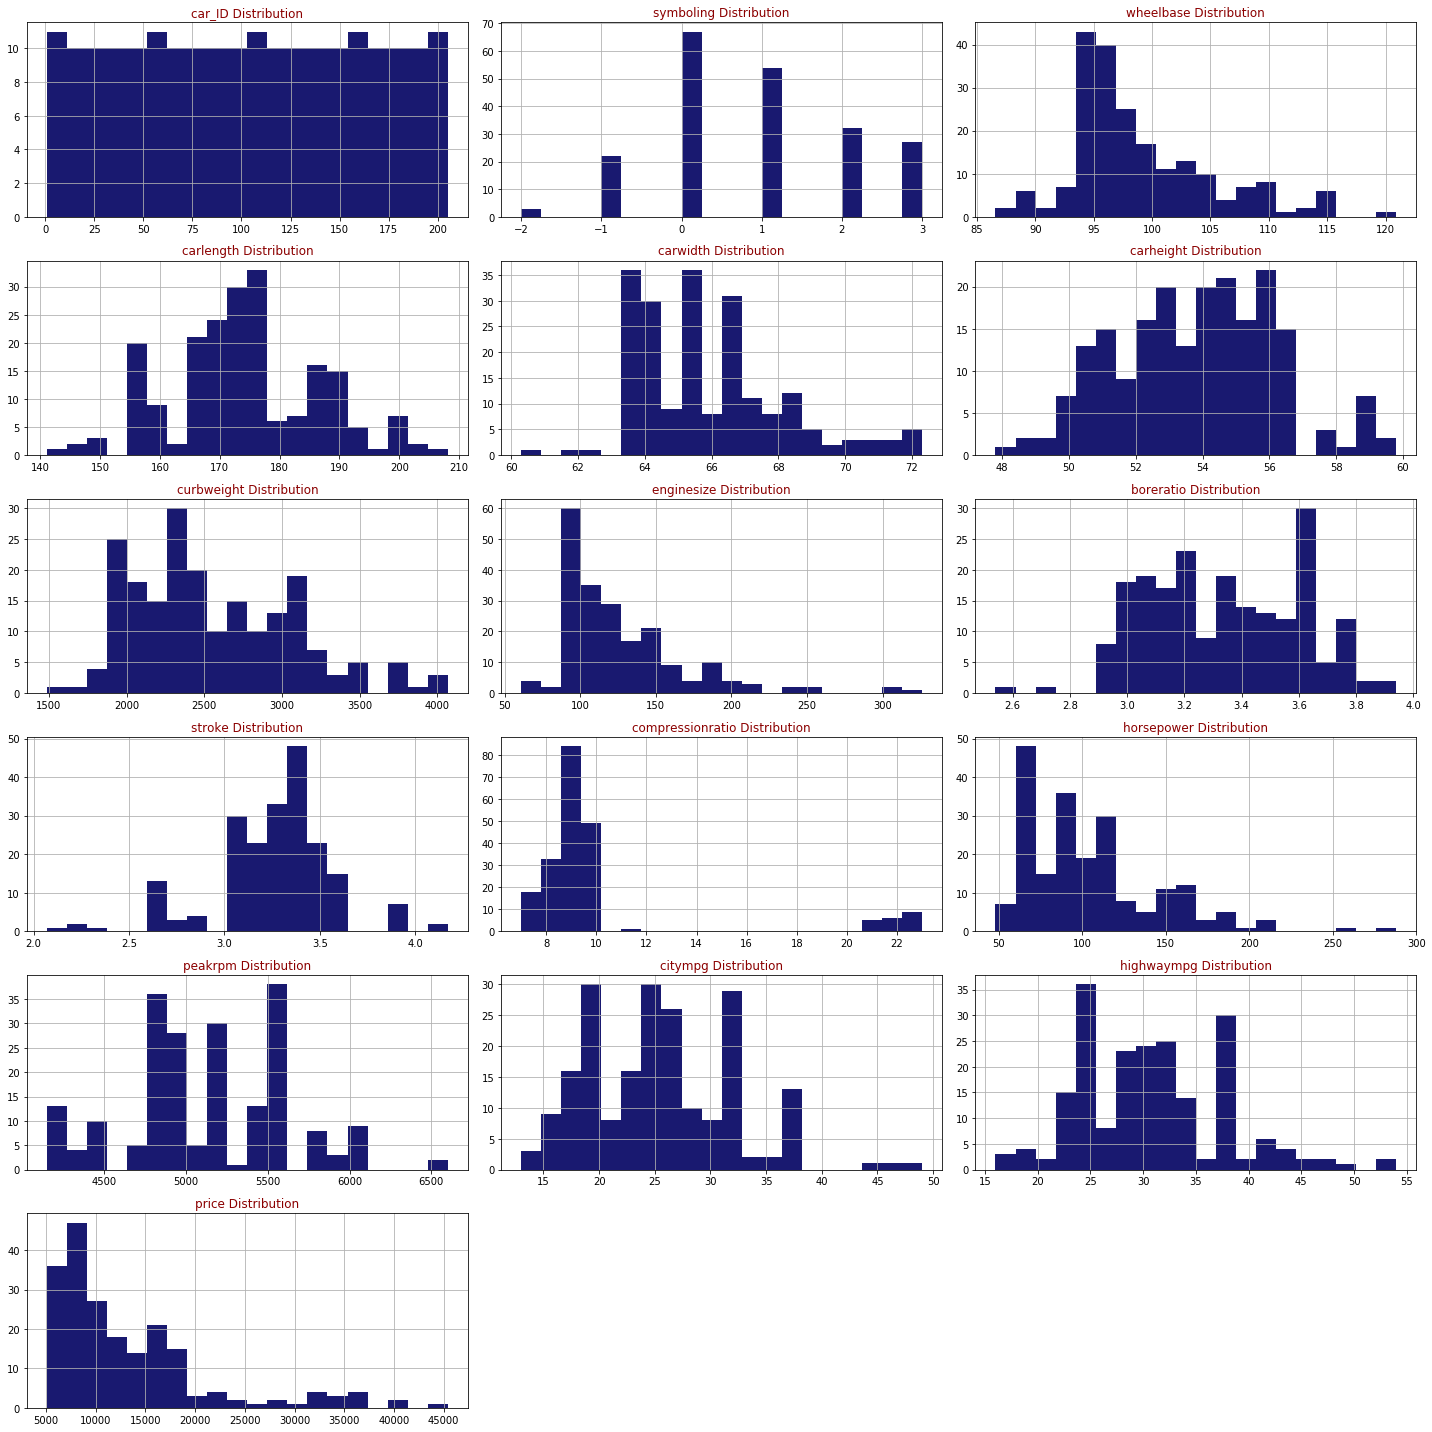

In [17]:
hist_plot(dataframe=cars, features=cars.columns, rows=6, cols=3)

- **მახასიათებლების ძირითადი სტატისტიკის შემოწმება**:

In [18]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- **მახასიათებლების წყვილწყვილი სკატერის ცხრილის აგება (Scatter plot):**

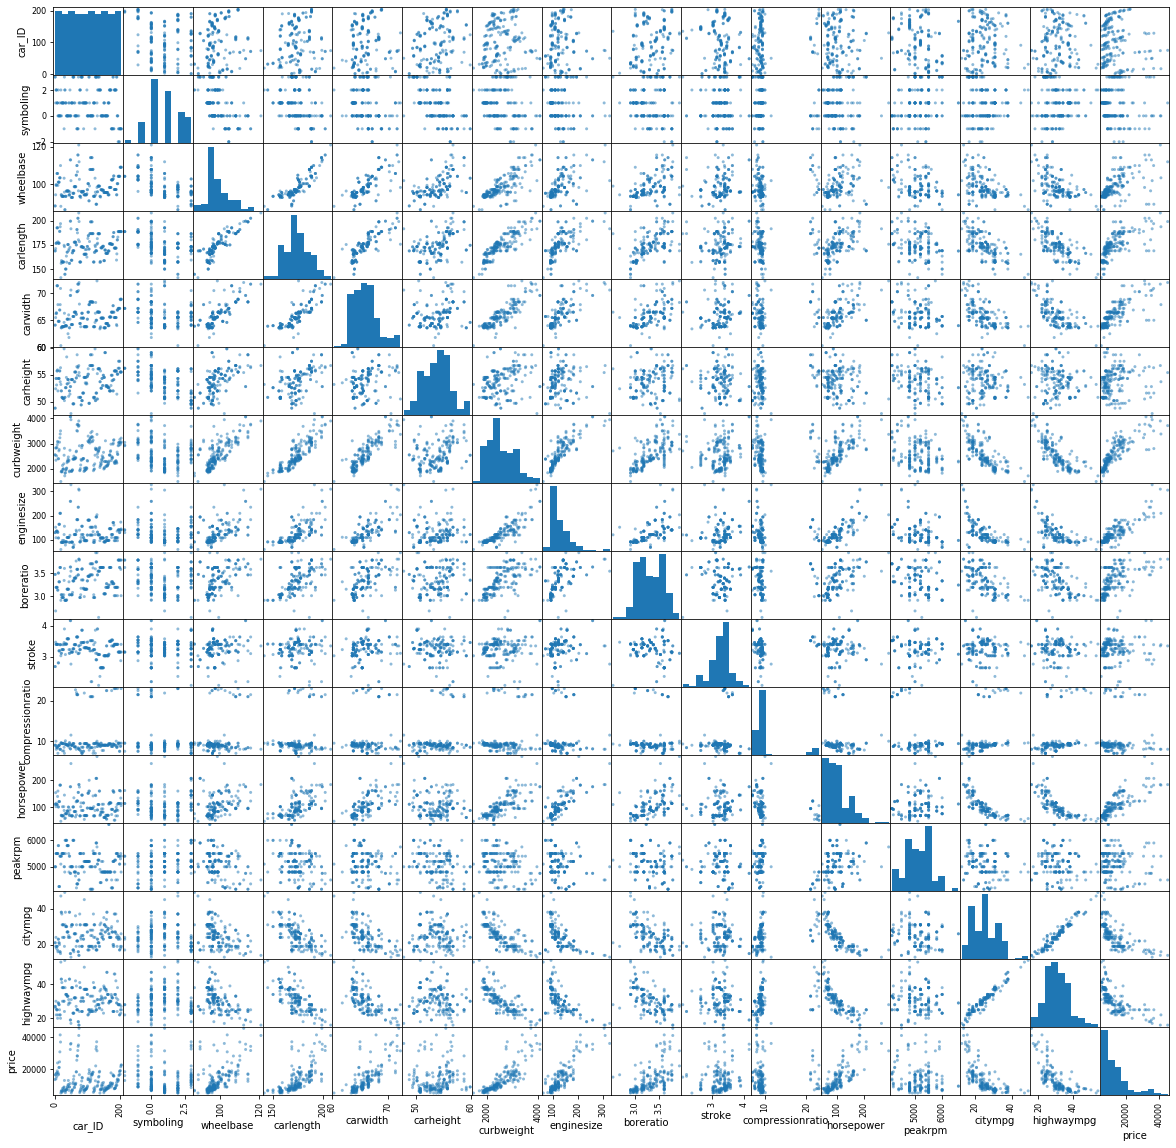

In [19]:
pd.plotting.scatter_matrix(cars, figsize=(20, 20));

- **მახასიათებლების კორელაციის ცხრილის აგება:**

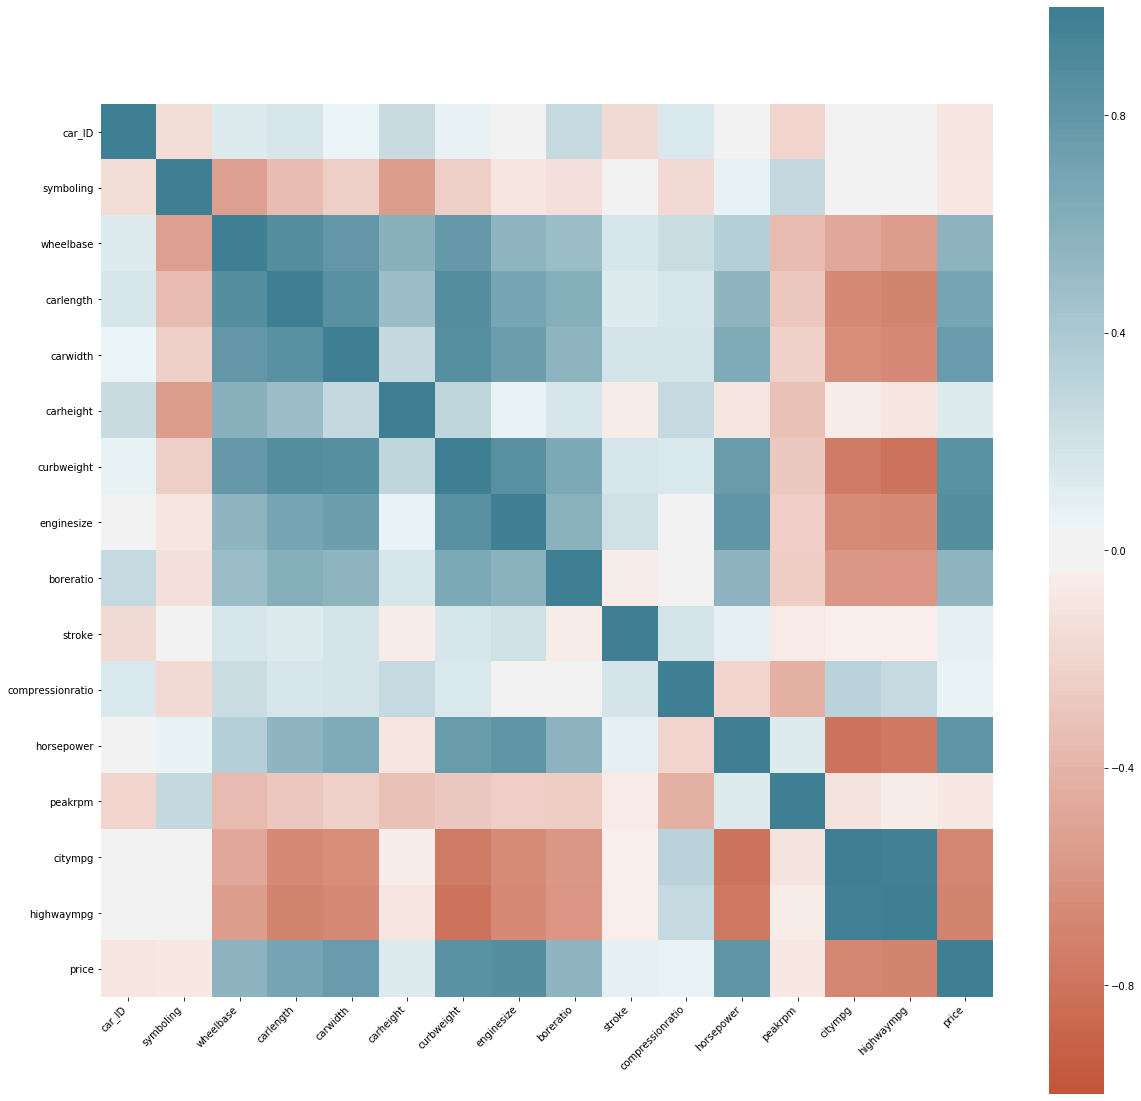

In [38]:
corr_plot(cars, figsize=(20,20))

- **ფასის და მახასიათებლების კორელაცია დალაგებული აბსოლუტური მნიშვნელობით კლებადობის მიხედვით:**

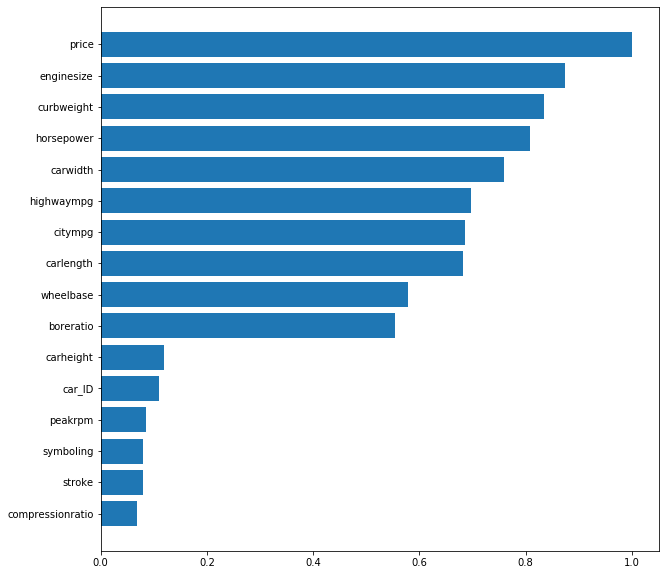

In [39]:
barh_plot(cars.corr()['price'].abs().sort_values(ascending=True))

In [41]:
cars.corr()['price'].abs().sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

- **შემდგომ ანალიზისთვის ავირჩიოთ რამოდენიმე ყველაზე მნიშვნელოვანი მახასიათებელი:**
  - enginesize
  - curbweight
  - horsepower
  - carwidth
  - highwaympg
  - citympg
  - carlength
  - wheelbase
  - boreratio

In [44]:
top_correlated_features = ['enginesize', 'curbweight', 'horsepower', 'carwidth',
                           'highwaympg', 'citympg', 'carlength', 'wheelbase', 'boreratio']

In [47]:
cars = cars[top_correlated_features + ['price']]
cars.head()

,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,wheelbase,boreratio,price
0,130,2548,111,64.1,27,21,168.8,88.6,3.47,13495.0
1,130,2548,111,64.1,27,21,168.8,88.6,3.47,16500.0
2,152,2823,154,65.5,26,19,171.2,94.5,2.68,16500.0
3,109,2337,102,66.2,30,24,176.6,99.8,3.19,13950.0
4,136,2824,115,66.4,22,18,176.6,99.4,3.19,17450.0


- **ყველაზე მნიშვნელოვანი მახასიათებლების წყვილწყვილი სკატერის ცხრილის აგება**:

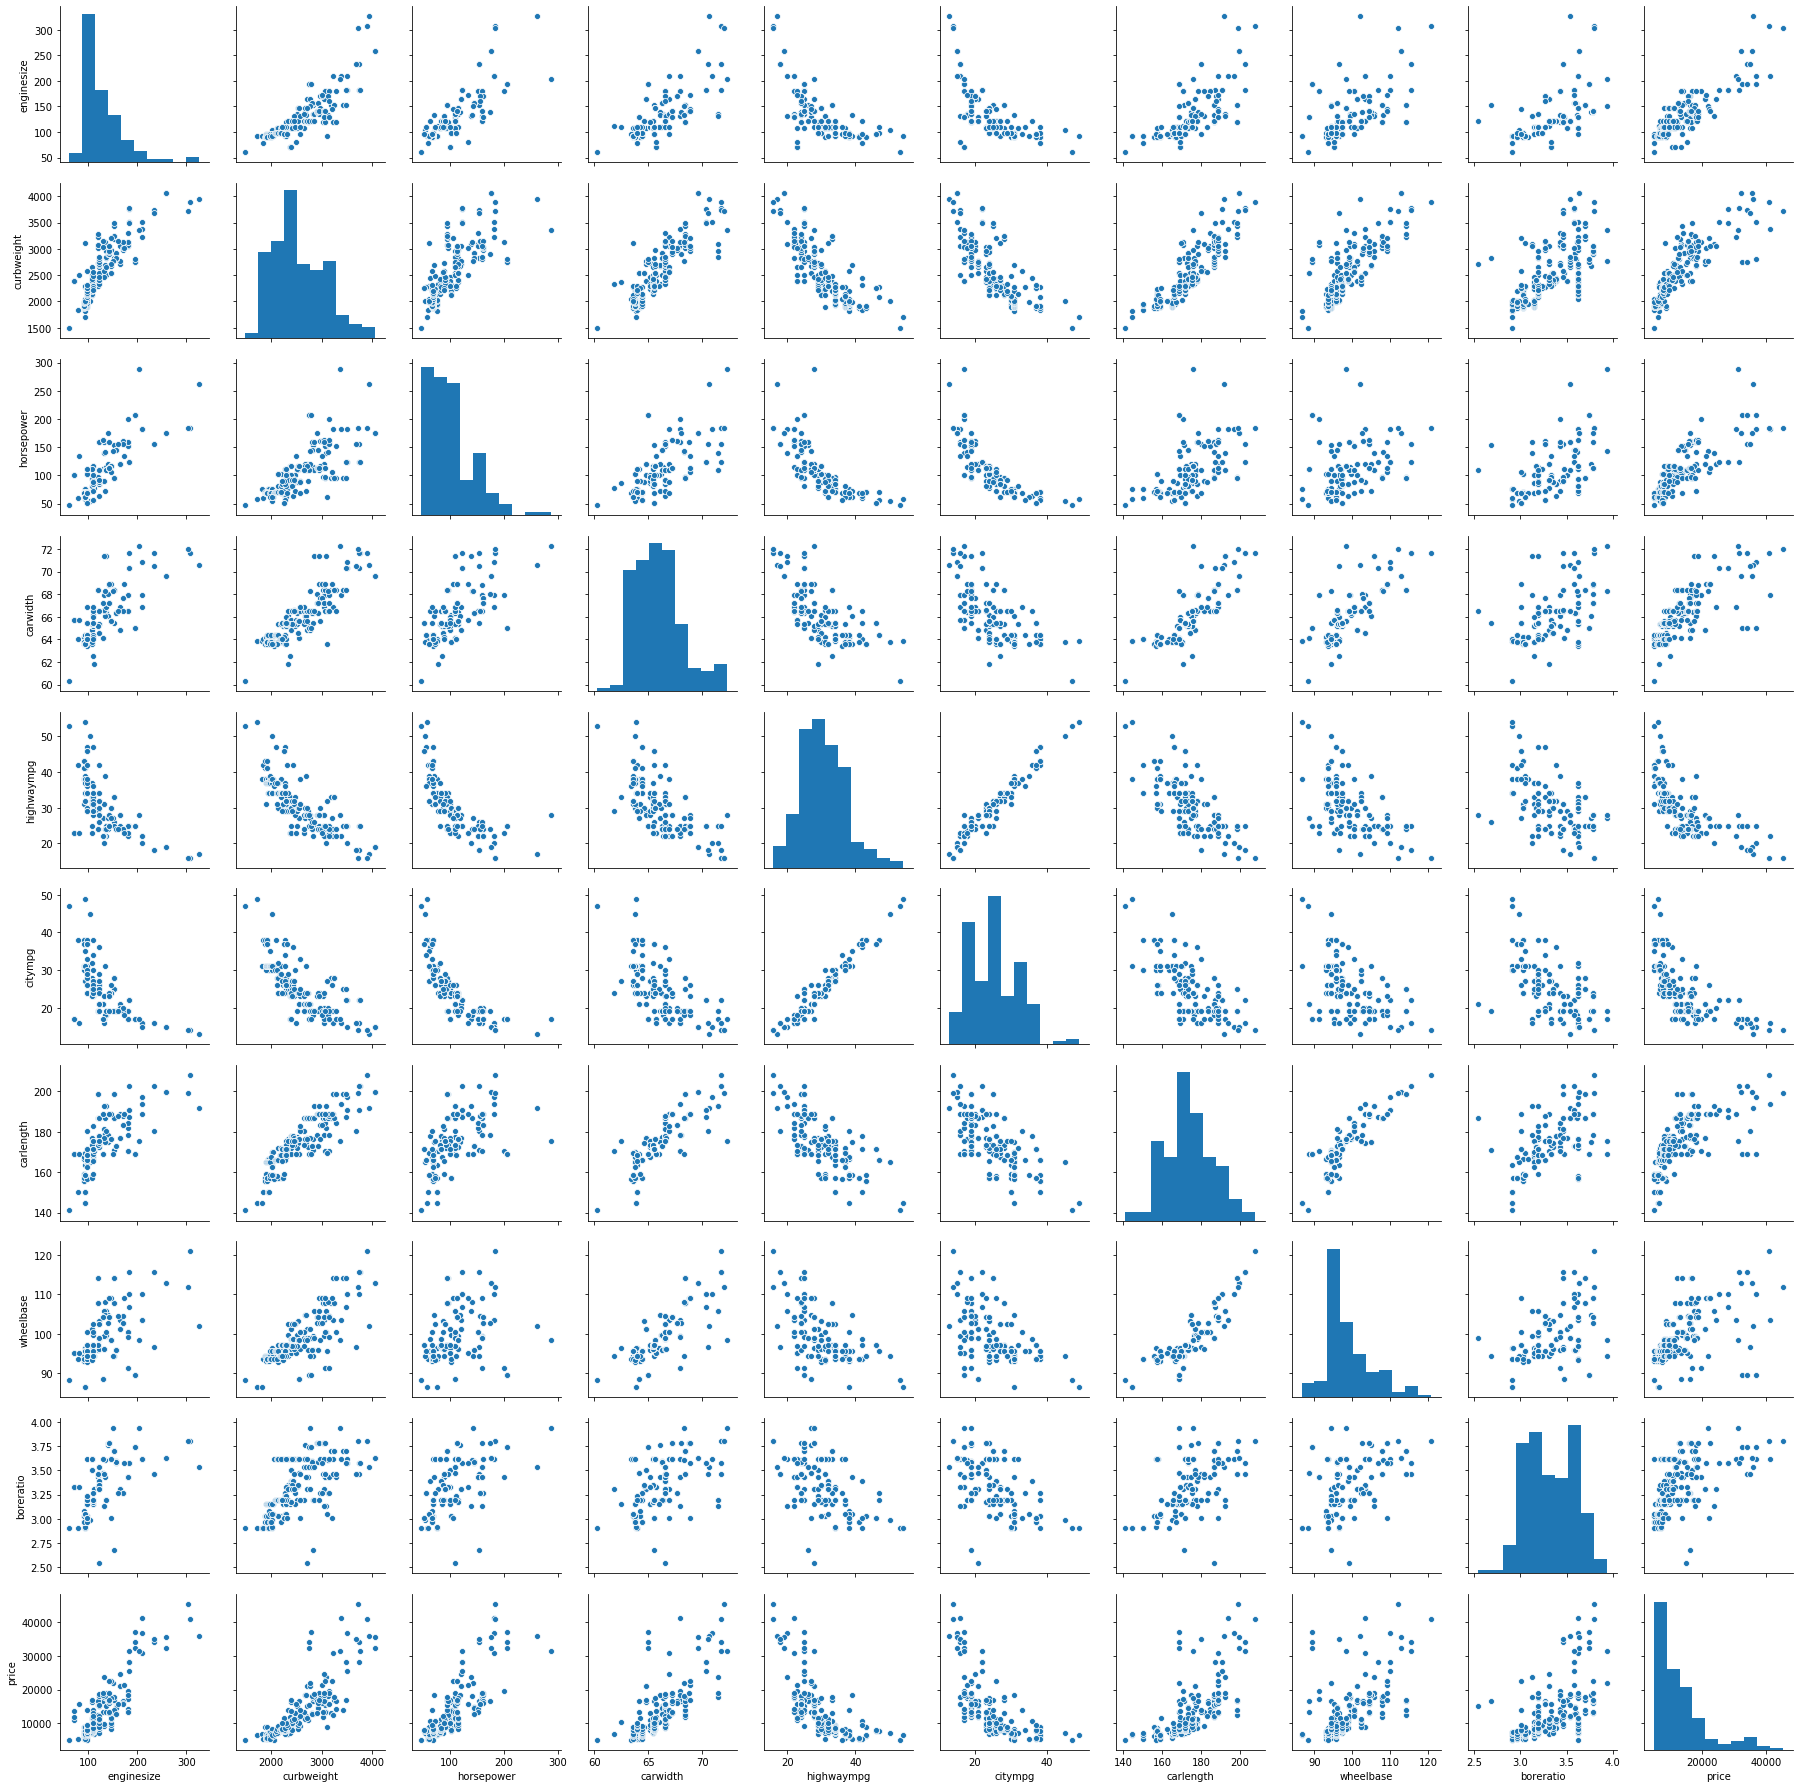

In [49]:
sns.pairplot(cars)
plt.show()

<h3 align="center">5. მონაცემთა სასწავლებლად მომზადება </h3>

<h3 align="center">მონაცემების Train და Test სიმრავლეებად დაყოფა და მახასიათებლების სკალირება</h3>

- **მონაცემთა დაყოფა**:

In [50]:
RANDOM_SEED = 42
TEST_SIZE = 0.3

In [51]:
df_train, df_test = train_test_split(cars, test_size = TEST_SIZE, random_state = RANDOM_SEED)

- **მახასიათებლების სკალირება:** გამოვიყენოთ,Min-Max Scaler მეთოდი, რომელიც ახდენს თითოეული მახასიათებლის სკალირებას [0,1] ინტერვალზე. ეს არის ძირითადი სკალირების მეთოდი, რომლის გამოყენებაც შესაძლებელია. 
  
  უფრო დეტალურად სკალირების შესახებ შეგიძლიათ ნახოთ [აქ](https://scikit-learn.org/stable/modules/preprocessing.html)


In [52]:
scaler = MinMaxScaler()

In [53]:
numerical_features = cars.columns.tolist()

- **ჩვენ უნდა მოვარგოთ სკალერი training data-ს და შემდგომ გარდავქმნათ იგი**


- ამისთვის გამივყენოთ fit_transform მეთოდი:

In [54]:
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

In [55]:
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

- **გადავამოწმოთ თუ როგორ შეიცვალა მნიშვნელოვანი მახასიათებლების წყვილწყვილი სკატერის ცხრილი:**

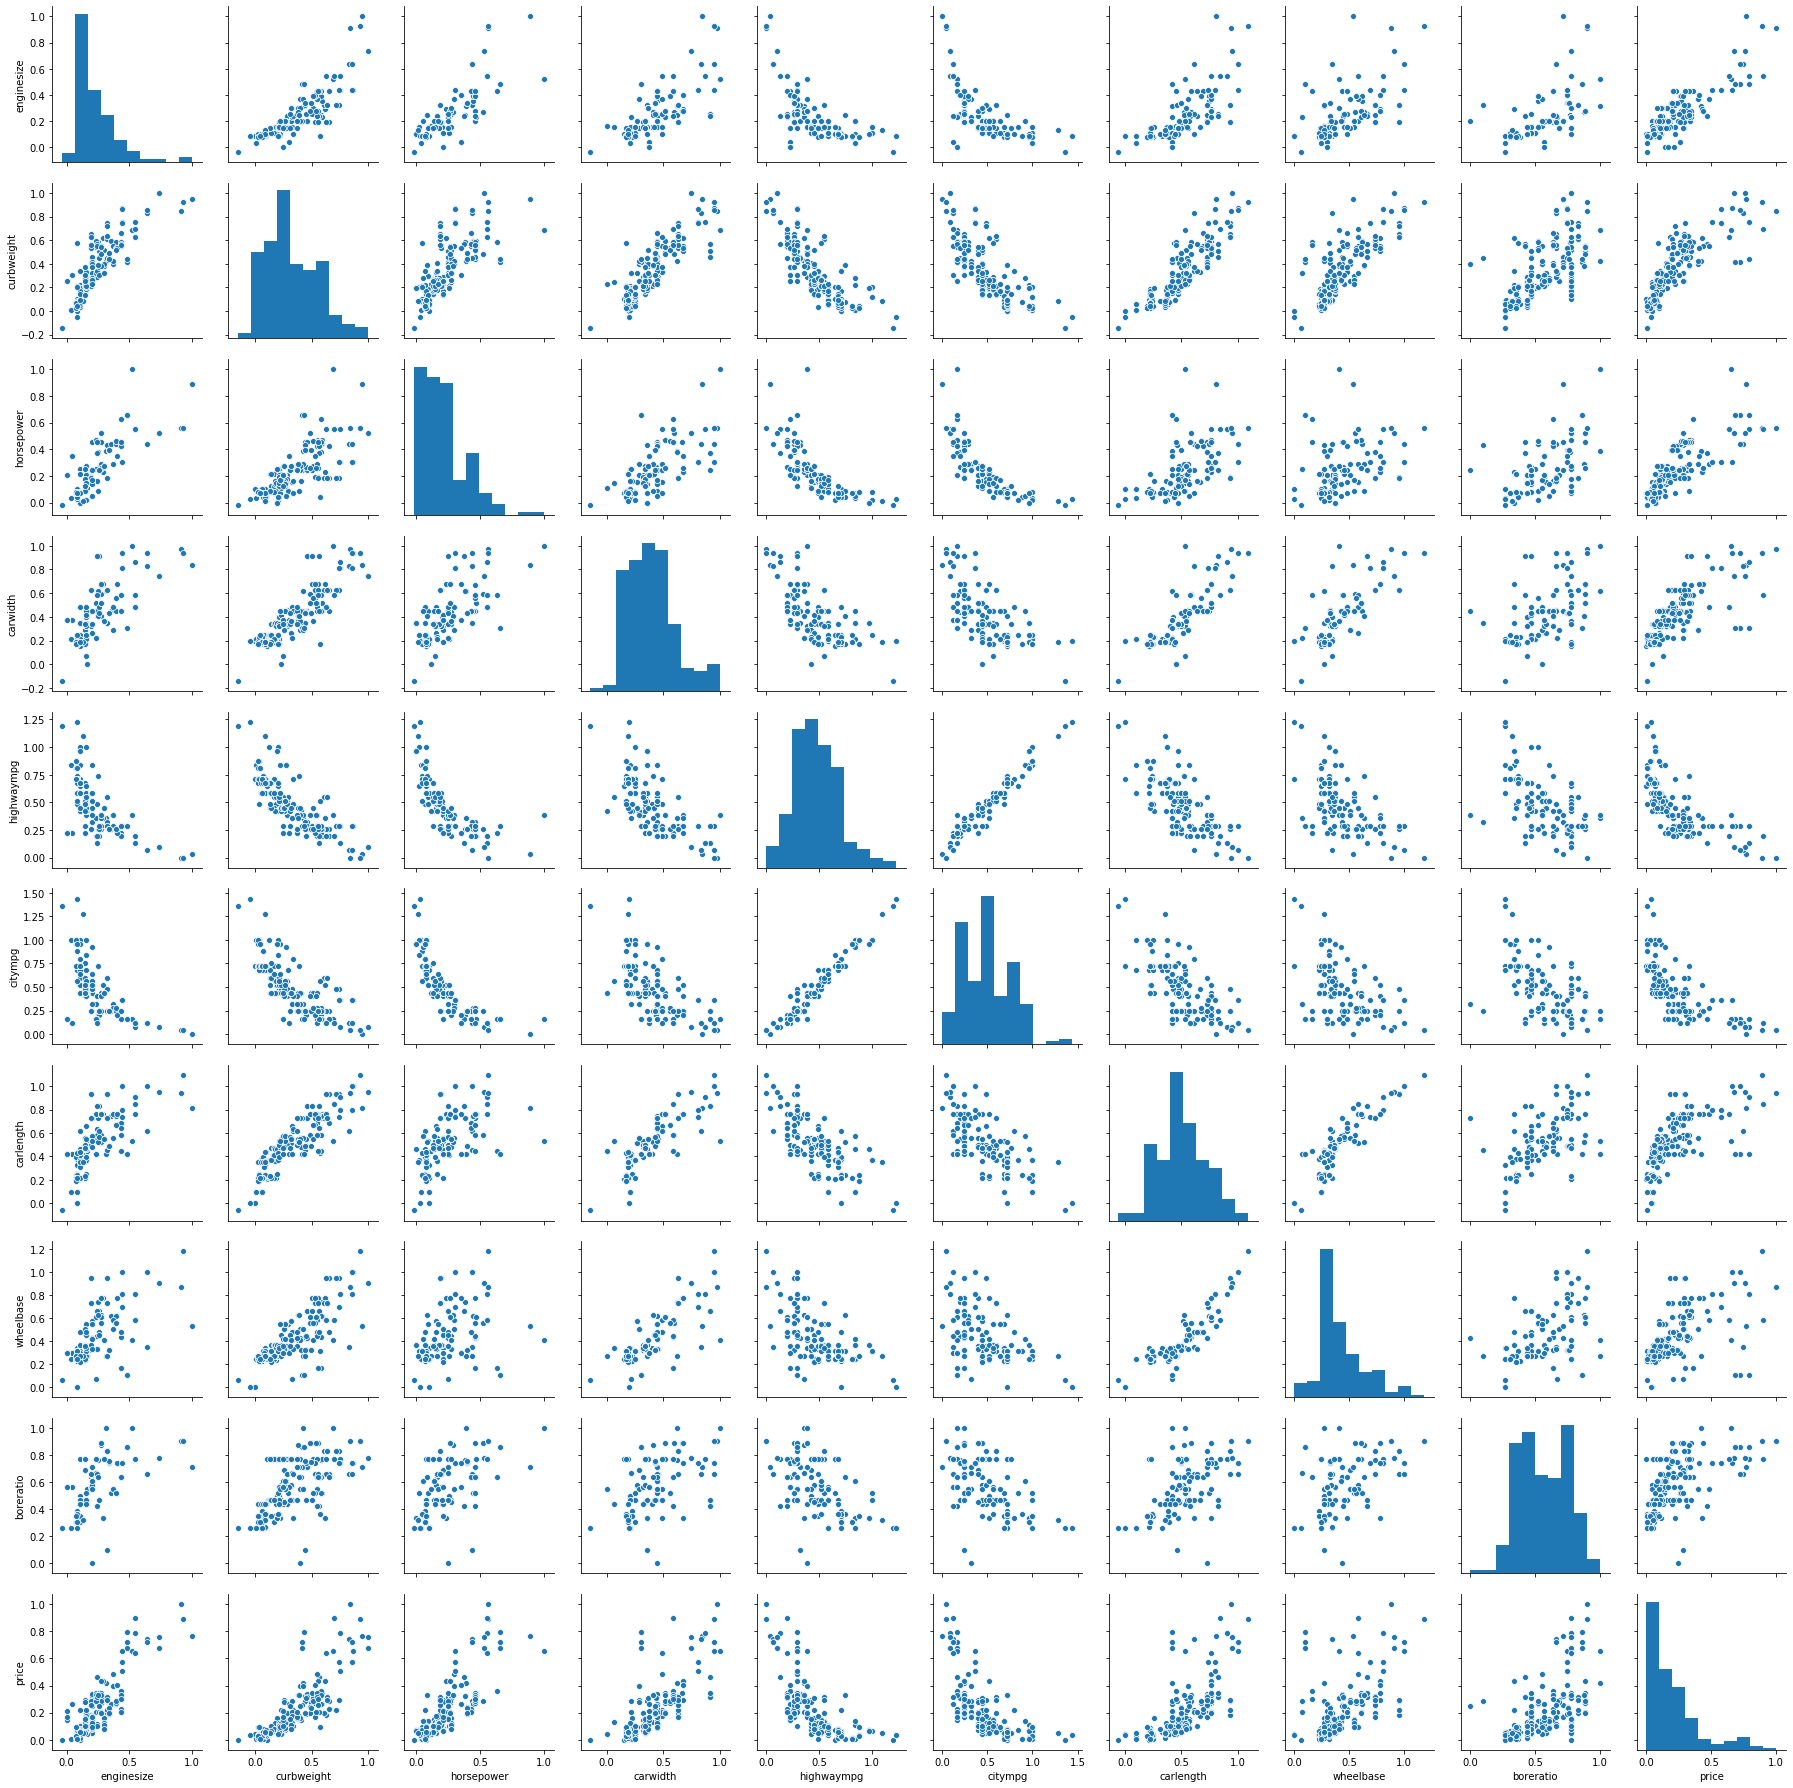

In [32]:
sns.pairplot(pd.concat([df_train, df_test], axis=0))
plt.show()


  - თუ შევადარებთ ორიგინალს (გარდაქმნების გარეშე) ვხედავთ, რომ იცვლება კორელაციები. 
  
  - ჩვენ ვაკეთებთ მახასიათებლების სკალირებას რომ დავაჩქაროთ სწავლების (ტრენინგის) დროს.
  
  - ამასთან, კარგი თვისობრივი ინჟინერიისა და მასშტაბის გამოყენებით შეგიძლიათ გაზარდოთ მოდელის სიზუსტე, რასაც ჩვენ ახლა ვაკეთებთ.

<h3 align="center">მონაცემების დაყოფა მახასიათებელ და მიზნობრივ ცვლადებად</h3>

In [56]:
input_features = numerical_features[:-1]

In [57]:
target_feature = numerical_features[-1]

In [58]:
y_train = df_train[target_feature]
X_train = df_train[input_features]

In [59]:
y_test = df_test[target_feature]
X_test = df_test[input_features]

<h3 align="center">6. წრფივი რეგრესიის მეთოდის გამოყენება</h3>

- წრფივი რეგრესია (**Linear Regression**) - ეს არის რეგრესიული მოდელი, რომელიც სტატისტიკაში გამოიყენება ერთი (დამოკიდებული) ცვლადის y სხვაზე ან რამდენიმე სხვა ცვლადზე (დამოუკიდებელ ცვლადებზე) დამოკიდებულებაზე, წრფივი დამოკიდებულების ფუნქციით.

- უფრო დაწვრილებით შეგიძლიათ ანხოთ: [Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- **წრფივი მოტელის ინიციალიზაცია:**

In [60]:
model = LinearRegression()

- **Scoring-ის შექმნა cross validation-თვის**:

In [62]:
SCORING = {
    'mse': make_scorer(mean_squared_error)
}
CV = 20

In [63]:
scores = cross_validate(model, X_train, y_train, scoring=SCORING,cv=CV, return_estimator=True)

- რადგან ჩვენ არ გვაქვს ჰიპერპარატორები წრფივი რეგრესიის დასარეგულირებლად, ყველა მოდელი ერთნაირია და, შესაბამისად, ქულები რეალურად აღწერს იმას, თუ რამდენად რთულია თითოეული გაყოფა წრფივი ჰიპერსიბრტყით

In [64]:
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_mse']

In [65]:
all_models = scores['estimator']
all_scores = scores['test_mse']

In [66]:
all_models, all_scores

((LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  Li

- **Scores-ის ჰისტოგრამის შემოწმება**:

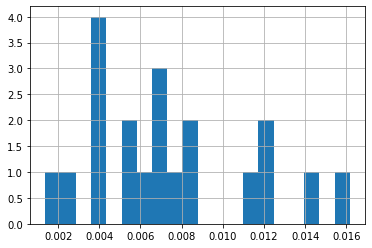

In [67]:
pd.Series(all_scores).hist(bins=20);

- **მოდით ავირჩიოთ რომელიმე (ნებისმიერი) მოდელი:**


In [68]:
best_model = all_models[all_scores.argmin()]

- **მოვახდინოთ მონაცემების პროგნოზი training data-ზე**

In [69]:
y_train_pred = best_model.predict(X_train)

- **ავაგოთ შეცდომების განაწილების ჰისტოგრამა:**

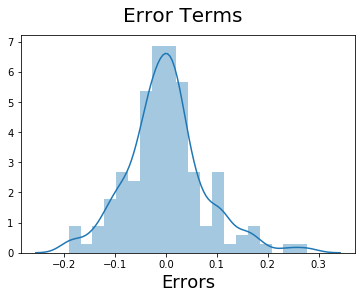

In [70]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18); 

- როგორც ვხედავთ, შეცდომების განაწილება ახლოს არის ნორმალურ განაწილებასთან, ანუ წრფივი მოდელი კარგად აღწერს მონაცემებზე

<h3 align="center">7. პროგნოზი და შეფასება</h3>

- **მოდით მოვახდინოთ ფასის ფროგნოზირება test data-ზე:**

In [72]:
y_test_pred = best_model.predict(X_test)

- **დავთვალოთ საშუალო კვადრატული გადახრა (MSE):**

In [73]:
mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

(0.010027033656850785, 0.7651669619299142)

- **მოდით ავაგოთ სკატერის ცხრილი y_test (ნამდვილი მნიშნველობა) და y_test_pred (პროგნოზი) რომ ვიზუალურად შევაფასოთ მოდელის ეფექტურობა**:

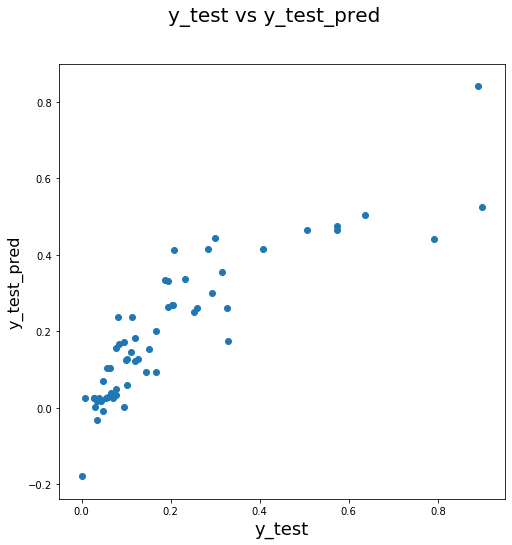

In [74]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16); 

<h1 align="center">ლექციის დასასრული</h1>